In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.constraints import max_norm
from PIL import Image
from random import shuffle
from sklearn.linear_model import LogisticRegression
import time
%matplotlib inline

Using TensorFlow backend.


In [4]:
# the data, split between train and test sets
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


In [6]:
# input image dimensions
img_rows, img_cols = 28, 28
num_classes = 10

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

Training data shape:  (60000, 28, 28, 1)
Training labels shape:  (60000, 10)
Test data shape:  (10000, 28, 28, 1)
Test labels shape:  (10000, 10)


In [7]:
batch_size = 128
epochs = 12

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 285s - loss: 2.0890 - acc: 0.2263 - val_loss: 0.5210 - val_acc: 0.8546
Epoch 2/12
60000/60000 [==============================] - 309s - loss: 0.4615 - acc: 0.8583 - val_loss: 0.2487 - val_acc: 0.9254
Epoch 3/12
60000/60000 [==============================] - 297s - loss: 0.3358 - acc: 0.8994 - val_loss: 0.2029 - val_acc: 0.9383
Epoch 4/12
60000/60000 [==============================] - 332s - loss: 0.2904 - acc: 0.9138 - val_loss: 0.1782 - val_acc: 0.9459
Epoch 5/12
60000/60000 [==============================] - 333s - loss: 0.2629 - acc: 0.9204 - val_loss: 0.1543 - val_acc: 0.9529
Epoch 6/12
60000/60000 [==============================] - 326s - loss: 0.2437 - acc: 0.9283 - val_loss: 0.1414 - val_acc: 0.9568
Epoch 7/12
60000/60000 [==============================] - 293s - loss: 0.2291 - acc: 0.9307 - val_loss: 0.1329 - val_acc: 0.9604
Epoch 8/12
60000/60000 [=======================

In [9]:
model.save('MNIST_ConvNet.h5')

In [10]:
Test_image_number = 55
print(x_test[Test_image_number])
print("Image_label:", y_test[Test_image_number])
print("Predicted Label: ", model.predict(x_test[Test_image_number]))
plt.figure(figsize = (1,1))
plt.imshow(x_test.reshape(10000,28,28)[Test_image_number], cmap = 'gray')

[[[  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]]

 [[  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.0000

ValueError: Error when checking : expected conv2d_1_input to have 4 dimensions, but got array with shape (28, 28, 1)

Predicted Label:  [[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]


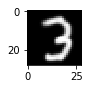

In [11]:
gimp_image = np.array(Image.open('gimp_image.png'))
plt.figure( figsize = (1,1))
plt.imshow(gimp_image, cmap = 'gray')
print("Predicted Label: ", model.predict(gimp_image.reshape(1,28,28,1)/255))